<a href="https://colab.research.google.com/github/irabi111/TDSPROJ1/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving users.csv to users (1).csv
Summary Statistics:
        public_repos     followers     following
count    337.000000    337.000000    337.000000
mean      88.252226    449.875371    130.338279
std       98.740514   1177.133492   1022.175189
min        0.000000    100.000000      0.000000
25%       28.000000    131.000000      2.000000
50%       61.000000    180.000000     19.000000
75%      108.000000    331.000000     69.000000
max      943.000000  12782.000000  18505.000000

Top 5 Users by Followers:
            login  followers  public_repos
0  mosh-hamedani      12782            27
1      TheCherno      11229            35
2        haileys       9392           372
3       rstacruz       6434           562
4  jesseduffield       4576            60

Top 5 Users by Public Repositories:
              login  public_repos  followers
322        roachhd           943        103
3         rstacruz           562       6434
154  dipjyotimetia           458        195
87       wolfeidau 

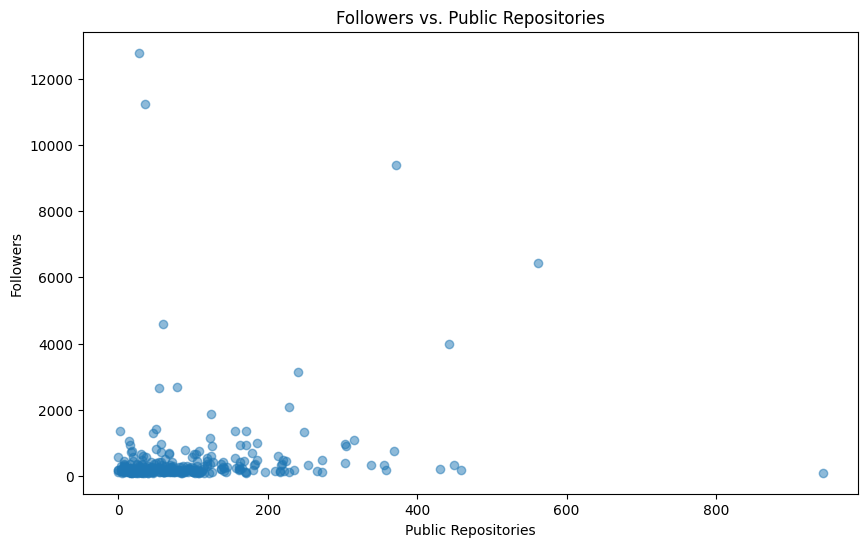


Average Followers and Public Repositories by Hireability Status:
            followers  public_repos
hireable                          
False     462.555102     83.040816
True      416.108696    102.130435


In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load the CSV file
from google.colab import files
uploaded = files.upload()

# Assuming your file is named 'users.csv'
data = pd.read_csv('users.csv')

# Convert 'created_at' to datetime format and calculate account age in years
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce').dt.tz_localize(None)
data['account_age'] = (datetime.now() - data['created_at']).dt.days / 365

# Descriptive stats for followers, public_repos, following
summary_stats = data[['public_repos', 'followers', 'following']].describe()
print("Summary Statistics:\n", summary_stats)

# Find top users by followers and public repositories
top_followed_users = data.sort_values(by='followers', ascending=False).head(5)
top_repo_users = data.sort_values(by='public_repos', ascending=False).head(5)

print("\nTop 5 Users by Followers:\n", top_followed_users[['login', 'followers', 'public_repos']])
print("\nTop 5 Users by Public Repositories:\n", top_repo_users[['login', 'public_repos', 'followers']])

# Correlation between account age, followers, and public repositories
correlation = data[['account_age', 'followers', 'public_repos']].corr()
print("\nCorrelation between Account Age, Followers, and Public Repos:\n", correlation)

# Plotting followers vs. repositories to visualize the disparity
plt.figure(figsize=(10, 6))
plt.scatter(data['public_repos'], data['followers'], alpha=0.5)
plt.title('Followers vs. Public Repositories')
plt.xlabel('Public Repositories')
plt.ylabel('Followers')
plt.show()

# Analysis based on hireable status
hireable_stats = data.groupby('hireable')[['followers', 'public_repos']].mean()
print("\nAverage Followers and Public Repositories by Hireability Status:\n", hireable_stats)
